In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm.auto import tqdm, trange
from tqdm.contrib import tenumerate
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
import seaborn as sns
import pandas as pd
import time
import itertools
import scipy.io
import jpype

In [66]:
# a_num = 400
# lag1para = np.linspace(0, 1, a_num)
# series_length = 2000
# ARpara = [np.r_[1, -arparams] for arparams in lag1para]
# sample_size = 100

In [2]:
# load the npy data 
AMI1data = np.load('data/AMImatrix_400_100_2000.npz')
AMI1matrix = AMI1data['AMImatrix']
lag1para = AMI1data['lag1para']
a_num = np.size(lag1para,0)
series_length = AMI1data['series_length']
sample_size = AMI1data['sample_size']


# np.ones_like(AMI1matrix[0, :])*lag1para[0]

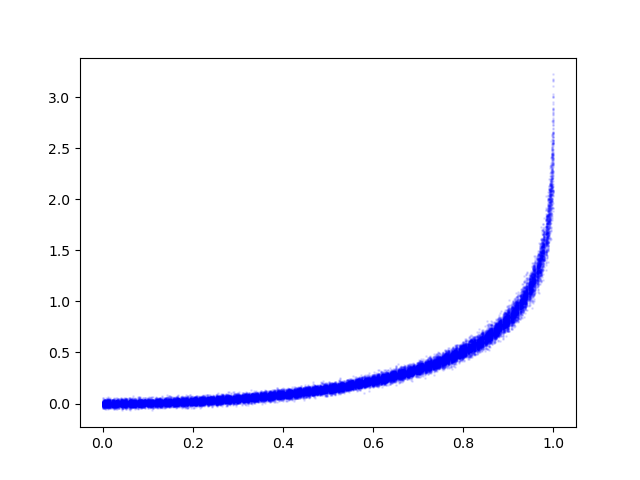

In [3]:


plt.figure(figsize=(10, 10))
# %matplotlib widget
for i in range(AMI1matrix.shape[0]):
    # use ocpacity to show the density, while light blue for all points, use ocpacity to show the density
    plt.scatter(np.ones_like(AMI1matrix[i, :])*lag1para[i], AMI1matrix[i, :], s=1, alpha=0.1, color='b')    
plt.show()


In [4]:
print(np.max(AMI1matrix))
print(np.min(AMI1matrix))


3.2218834617895302
-0.06732759794820442


In [11]:
# creat a panda dataframe to store the data, use df.concat to combine the data
# df = pd.DataFrame()
# for i in range(AMI1matrix.shape[0]):
#     df = pd.concat([df, pd.DataFrame({'lag1para': np.ones_like(AMI1matrix[i, :])*lag1para[i], 'AMI': AMI1matrix[i, :]})])



# df.shape
# df.tail(1000)

# creat a dictionary AMIdict to give each lag1para a list of AMI
AMIdict = {}
for i in range(AMI1matrix.shape[0]):
    AMIdict[lag1para[i]] = AMI1matrix[i, :]

    

AMI_prepands_list = []
for x, y_values in AMIdict.items():
    for y in y_values:
        AMI_prepands_list.append({'lag1para': x, 'AMI': y})

df = pd.DataFrame(AMI_prepands_list)



In [12]:
df

,lag1para,AMI
0,0.0,-0.026396
1,0.0,0.033240
2,0.0,0.002487
3,0.0,-0.015568
4,0.0,-0.011362
...,...,...
39995,1.0,2.071658
39996,1.0,3.012443
39997,1.0,2.641384
39998,1.0,2.232618


/var/folders/tb/pt6y5vkj3fv9hx3q1df1nh6w0000gn/T/ipykernel_76029/2012322865.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x='lag1para', y='AMI', cmap="viridis", shade=True)


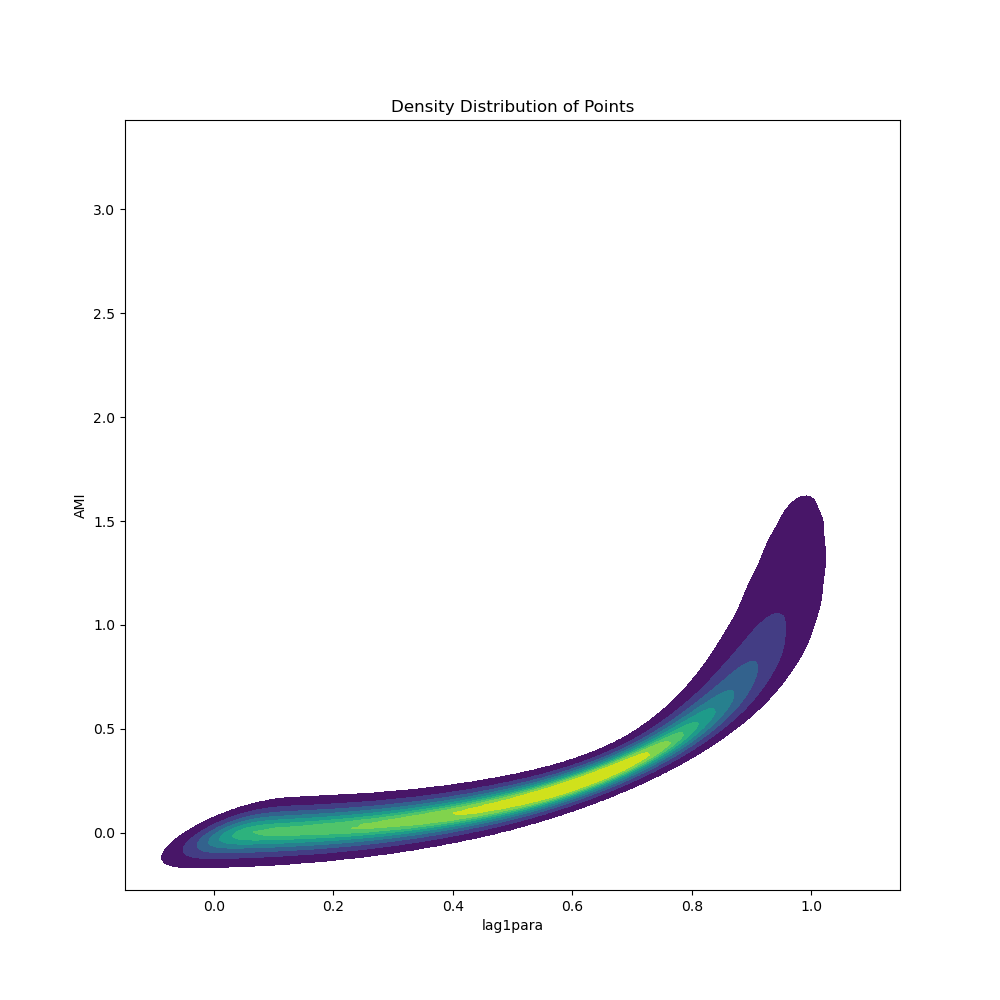

In [8]:
plt.figure(figsize=(10, 10))
sns.kdeplot(data=df, x='lag1para', y='AMI', cmap="viridis", shade=True)
plt.xlabel("lag1para")
plt.ylabel("AMI")
plt.title("Density Distribution of Points")
plt.show()

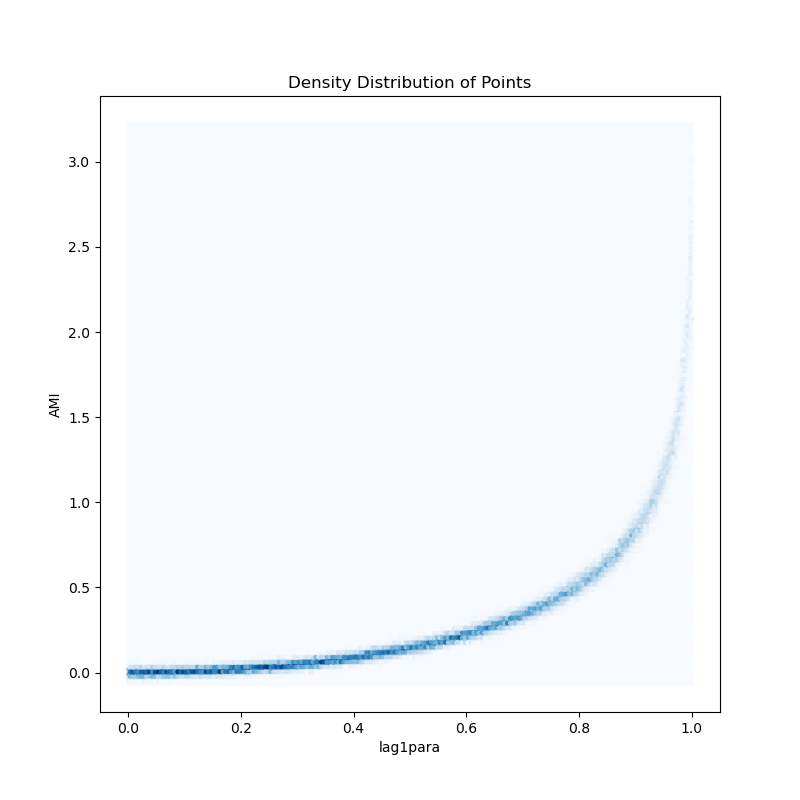

In [23]:
plt.figure(figsize=(8, 8))
plt.hexbin(df['lag1para'], df['AMI'], gridsize=200, cmap='Blues')
plt.xlabel("lag1para")
plt.ylabel("AMI")
plt.title("Density Distribution of Points")
plt.show()


Clearly, with 2000 long AR series, It is obvious that when the value of 'a' is relatively small, the distribution of sample points' AMI is more concentrated, while for larger 'a', the distribution of these samples' AMI is more dispersed.